In [1]:
!pip install scikit-learn==1.0.2
!pip install snapml

  Using cached scikit-learn-1.0.2.tar.gz (6.7 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'


  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 1
  
  [66 lines of output]
  Partial import of sklearn during the build process.
  setup.py:128: DeprecationWarning:
  
    `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
    of the deprecation of `distutils` itself. It will be removed for
    Python >= 3.12. For older Python versions it will remain present.
    It is recommended to use `setuptools < 60.0` for those Python versions.
    For more details, see:
      https://numpy.org/devdocs/reference/distutils_status_migration.html
  
  
    from numpy.distutils.command.build_ext import build_ext  # noqa
  INFO: No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  Traceback (most recent call last):
    File "C:\Users\MADHUSUDAN\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
    File "C:\Users

In [2]:
#importing libraries

In [3]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
import time
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("C:/Users/MADHUSUDAN/Downloads/snapML.csv")
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [5]:
print("There are " + str(len(df)) + " observations in the credit card fraud dataset.")
print("There are " + str(len(df.columns)) + " variables in the dataset.")

There are 284807 observations in the credit card fraud dataset.
There are 31 variables in the dataset.


In [6]:
#let n=10

In [7]:
n = 10
df1 = pd.DataFrame(np.repeat(df.values, n, axis=0), columns=df.columns)

In [8]:
print("There are " + str(len(df1)) + " observations in the inflated credit card fraud dataset.")
print("There are " + str(len(df1.columns)) + " variables in the dataset.")

There are 2848070 observations in the inflated credit card fraud dataset.
There are 31 variables in the dataset.


In [9]:
df1.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
2   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
3   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
4   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
2  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
3  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
4  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62    0.0  
1 -0.189115  0.133558 -0.021053  149.62    0.0  
2 -0.189115  0.133558 -0.021053  149.62    0.0  
3 -0.189115  0.133558 -0.021053  149.62    0.0  
4 -0.189115  0.133558 -0.021053  149.62    0.0  

[5 rows x 31 columns]

In [10]:
#labels

In [11]:
labels = df1.Class.unique()

In [12]:
#sizes

In [13]:
sizes = df1.Class.value_counts().values

In [14]:
#plotting

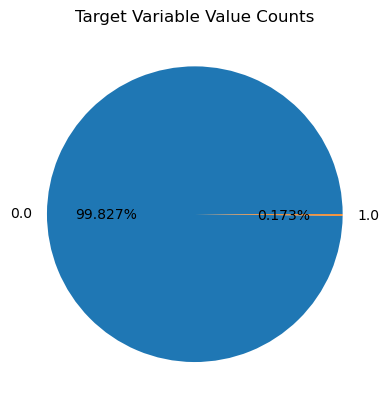

In [15]:
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()

In [16]:
#histogram

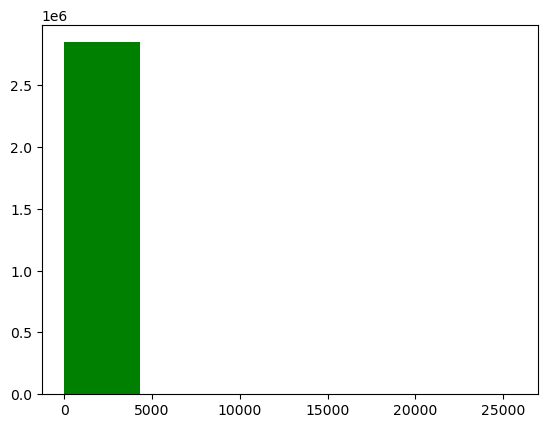

In [17]:
plt.hist(df1.Amount.values, 6, histtype='bar', facecolor='g')
plt.show()

In [18]:
#range

In [19]:
print("Minimum amount value is ", np.min(df1.Amount.values))
print("Maximum amount value is ", np.max(df1.Amount.values))
print("90% of the transactions have an amount less or equal than ", np.percentile(df.Amount.values, 90))

Minimum amount value is  0.0
Maximum amount value is  25691.16
90% of the transactions have an amount less or equal than  203.0


In [20]:
#data preprocessing

In [21]:
df1.iloc[:, 1:30] = StandardScaler().fit_transform(df1.iloc[:, 1:30])
data = df1.values

In [22]:
#feature matrix

In [23]:
X = data[:, 1:30]

In [24]:
#labels vector

In [25]:
y = data[:, 30]

In [26]:
#data normalization

In [27]:
X = normalize(X, norm="l1")

In [28]:
#shapes

In [29]:
print('X.shape=', X.shape)
print('y.shape=', y.shape)

X.shape= (2848070, 29)
y.shape= (2848070,)


In [30]:
#train test split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)       

In [32]:
print('X_train.shape =', X_train.shape, 'Y_train.shape =', y_train.shape)
print('X_test.shape =', X_test.shape, 'Y_test.shape =', y_test.shape)

X_train.shape = (1993649, 29) Y_train.shape = (1993649,)
X_test.shape = (854421, 29) Y_test.shape = (854421,)


In [33]:
#buliding decision tree classifier with scikit learn

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
#computing sample weight

In [36]:
train = compute_sample_weight('balanced', y_train)

In [37]:
sklearn_dt = DecisionTreeClassifier(max_depth=4, random_state=35)

In [38]:
#training

In [39]:
t0 = time.time()
sklearn_dt.fit(X_train, y_train, sample_weight=train)
sklearn_time = time.time()-t0
print("[Scikit-Learn] Training time (s):  {0:.5f}".format(sklearn_time))

[Scikit-Learn] Training time (s):  64.46726


In [40]:
#buliding decision tree classifier with snapML

In [41]:
from snapml import DecisionTreeClassifier

In [42]:
snapml_dt = DecisionTreeClassifier(max_depth=4, random_state=45, n_jobs=4)

In [43]:
#training

In [44]:
t0 = time.time()
snapml_dt.fit(X_train, y_train, sample_weight=train)
snapml_time = time.time()-t0
print("[Snap ML] Training time (s):  {0:.5f}".format(snapml_time))

[Snap ML] Training time (s):  5.10977


In [45]:
#evaluating both

In [46]:
training_speedup = sklearn_time/snapml_time
print('[Decision Tree Classifier] Snap ML vs. Scikit-Learn speedup : {0:.2f}x '.format(training_speedup))

[Decision Tree Classifier] Snap ML vs. Scikit-Learn speedup : 12.62x 


In [47]:
#probability predictions

In [48]:
sklearn_pred = sklearn_dt.predict_proba(X_test)[:,1]
snapml_pred = snapml_dt.predict_proba(X_test)[:,1]

In [49]:
#ROC-AUC curve

In [50]:
sklearn_roc_auc = roc_auc_score(y_test, sklearn_pred)
print('[Scikit-Learn] ROC-AUC score : {0:.3f}'.format(sklearn_roc_auc))

[Scikit-Learn] ROC-AUC score : 0.966


In [51]:
snapml_roc_auc = roc_auc_score(y_test, snapml_pred)   
print('[Snap ML] ROC-AUC score : {0:.3f}'.format(snapml_roc_auc))

[Snap ML] ROC-AUC score : 0.966


In [52]:
#building SVM with scikit learn

In [53]:
from sklearn.svm import LinearSVC

In [54]:
sklearn_svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)

In [55]:
#training

In [56]:
t0 = time.time()
sklearn_svm.fit(X_train, y_train)
sklearn_time = time.time() - t0
print("[Scikit-Learn] Training time (s):  {0:.2f}".format(sklearn_time))

[Scikit-Learn] Training time (s):  90.63


In [57]:
#building SVM with snapML

In [58]:
from snapml import SupportVectorMachine

In [59]:
snapml_svm = SupportVectorMachine(class_weight='balanced', random_state=25, n_jobs=4, fit_intercept=False)

In [60]:
#training

In [61]:
t0 = time.time()
model = snapml_svm.fit(X_train, y_train)
snapml_time = time.time() - t0
print("[Snap ML] Training time (s):  {0:.2f}".format(snapml_time))

[Snap ML] Training time (s):  15.44


In [62]:
#evaluating both

In [63]:
training_speedup = sklearn_time/snapml_time
print('[Support Vector Machine] Snap ML vs. Scikit-Learn training speedup : {0:.2f}x '.format(training_speedup))

[Support Vector Machine] Snap ML vs. Scikit-Learn training speedup : 5.87x 


In [64]:
#decision function predictions

In [65]:
sklearn_pred = sklearn_svm.decision_function(X_test)
snapml_pred = snapml_svm.decision_function(X_test)

In [66]:
#ROC-AUC curve

In [67]:
acc_sklearn  = roc_auc_score(y_test, sklearn_pred)
print("[Scikit-Learn] ROC-AUC score:   {0:.3f}".format(acc_sklearn))
acc_snapml  = roc_auc_score(y_test, snapml_pred)
print("[Snap ML] ROC-AUC score:   {0:.3f}".format(acc_snapml))

[Scikit-Learn] ROC-AUC score:   0.984
[Snap ML] ROC-AUC score:   0.985


In [68]:
#confidence scores

In [69]:
sklearn_pred = sklearn_svm.decision_function(X_test)
snapml_pred  = snapml_svm.decision_function(X_test)

In [70]:
#hinge loss

In [71]:
from sklearn.metrics import hinge_loss

In [72]:
loss_snapml = hinge_loss(y_test, snapml_pred)
print("[Snap ML] Hinge loss:   {0:.3f}".format(loss_snapml))

[Snap ML] Hinge loss:   0.228


In [73]:
loss_sklearn = hinge_loss(y_test, sklearn_pred)
print("[Scikit-Learn] Hinge loss:   {0:.3f}".format(loss_snapml))

[Scikit-Learn] Hinge loss:   0.228
